In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors # for custom color maps

# import data for specific basal ganglia ROIs
df = pd.read_csv("MNI Subject/ADHD_ICM_random200.csv")
ROI_df = df[["'Subject_ID'", "'Gender'", "'Age'", "'Diagnosis'", "'Caud_L'", "'Caud_R'", "'Caudate_tail_L'", "'Caudate_tail_R'", "'GP_L'", "'GP_R'", "'NucAccumbens_L'", "'NucAccumbens_R'", "'Put_L'", "'Put_R'"]]
ROI_df.columns = ROI_df.columns.str.strip("'")
ROI_df.head()

,Subject_ID,Gender,Age,Diagnosis,Caud_L,Caud_R,Caudate_tail_L,Caudate_tail_R,GP_L,GP_R,NucAccumbens_L,NucAccumbens_R,Put_L,Put_R
0,'Subject_1','F',5.873973,'NORMAL',6132,6097,20,183,269,111,2703,2700,3485,4398
1,'Subject_2','M',10.893151,'ADHD',7615,7178,285,284,1425,1300,1263,1699,5703,6814
2,'Subject_3','M',4.106849,'NORMAL',9410,8465,148,17,270,190,1694,900,5812,5997
3,'Subject_4','M',6.772603,'ADHD',4836,4672,287,281,1330,1311,883,1014,4798,4897
4,'Subject_5','M',5.816438,'ADHD',4623,4650,232,250,1485,1373,969,910,4907,5080


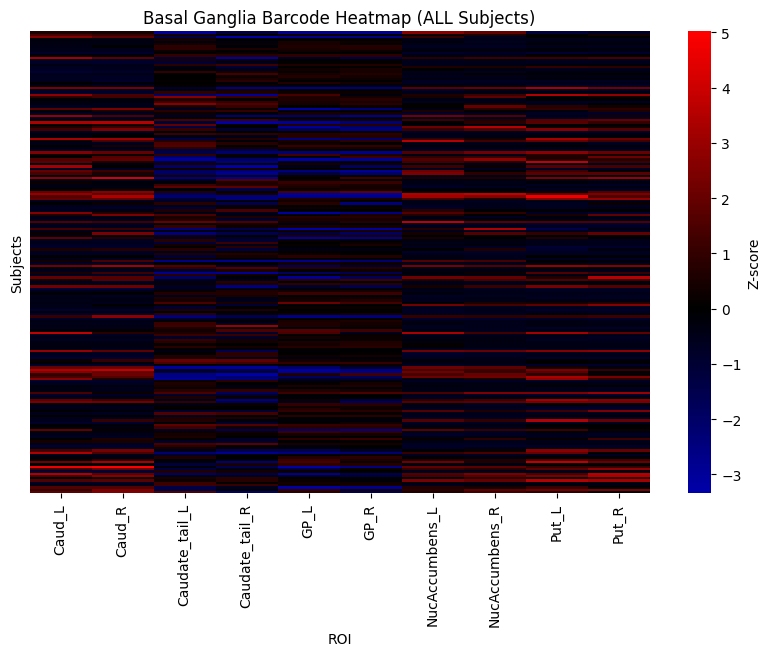

In [2]:
# control patients 
control_df = ROI_df[ROI_df["Diagnosis"] == "'NORMAL'"]
control_df = control_df.drop(columns=["Subject_ID", "Gender", "Age", "Diagnosis"])

# calculate mean and std for each ROI in control group
control_means = control_df.mean(numeric_only=True)
control_stds = control_df.std(numeric_only=True)
control_means, control_stds

# compute z-scores for all subjects based on control group statistics
z_scores = (ROI_df.drop(columns=["Subject_ID", "Gender", "Age", "Diagnosis"]).astype(float) - control_means) / control_stds
z_scores.insert(0, "Diagnosis", ROI_df["Diagnosis"]) # nothing is reordered so we can add back subject_id and diagnosis
z_scores.insert(0, "Subject_ID", ROI_df["Subject_ID"])

# save to CSV
z_scores.to_csv("ROI_z_scores.csv", index=False)

# generate barcodes
barcodes = z_scores.drop(columns=["Subject_ID", "Diagnosis"]).to_numpy()

# custom color map: Black = 0, Red = Positive, Blue = Negative
# creates a gradient between the colors
colors = ["blue", "black", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("blue_black_red", colors)

# plot barcodes for ALL subjects
plt.figure(figsize=(10, 6))
sns.heatmap(barcodes, cmap=cmap, center=0, cbar_kws={"label": "Z-score"}, xticklabels=z_scores.columns.drop(["Subject_ID", "Diagnosis"]),
        yticklabels=[])
plt.title("Basal Ganglia Barcode Heatmap (ALL Subjects)")
plt.xlabel("ROI")
plt.ylabel("Subjects")
plt.show()

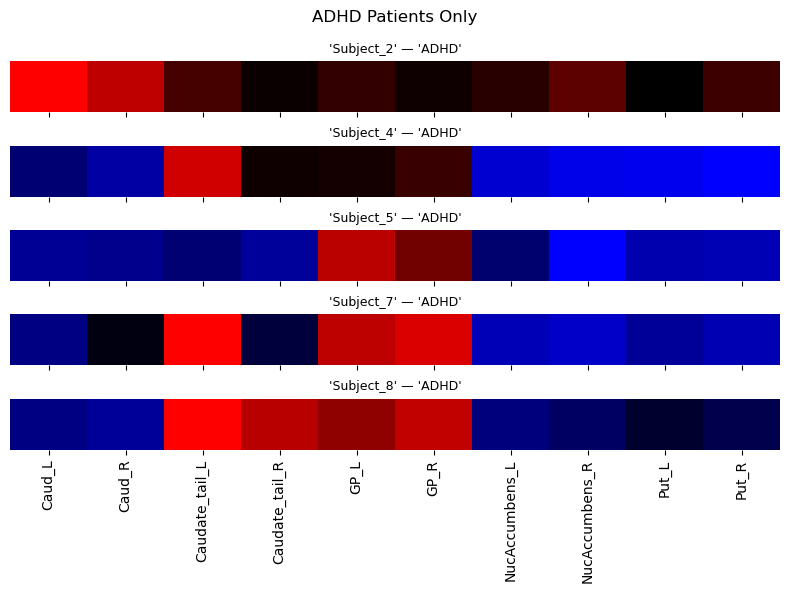

In [14]:
# plot barcodes for select ADHD subjects 
adhd_patients = z_scores[z_scores["Diagnosis"] == "'ADHD'"].head(5)

fig, axes = plt.subplots(5, 1, figsize=(8, 6), sharex=True)

for i, (_, row) in enumerate(adhd_patients.iterrows()):
    vals = row.drop(labels=["Subject_ID", "Diagnosis"]).astype(float).to_numpy().reshape(1, -1)
    sns.heatmap(
        vals,
        cmap=cmap,
        center=0,
        cbar=False,
        xticklabels=(z_scores.columns.drop(["Subject_ID", "Diagnosis"]) if i == 4 else []), # only want 5 patients
        yticklabels=[],
        ax=axes[i]
    )
    axes[i].set_title(f"{row['Subject_ID']} — {row['Diagnosis']}", fontsize=9)

fig.suptitle("ADHD Patients Only")
plt.tight_layout()
plt.show()


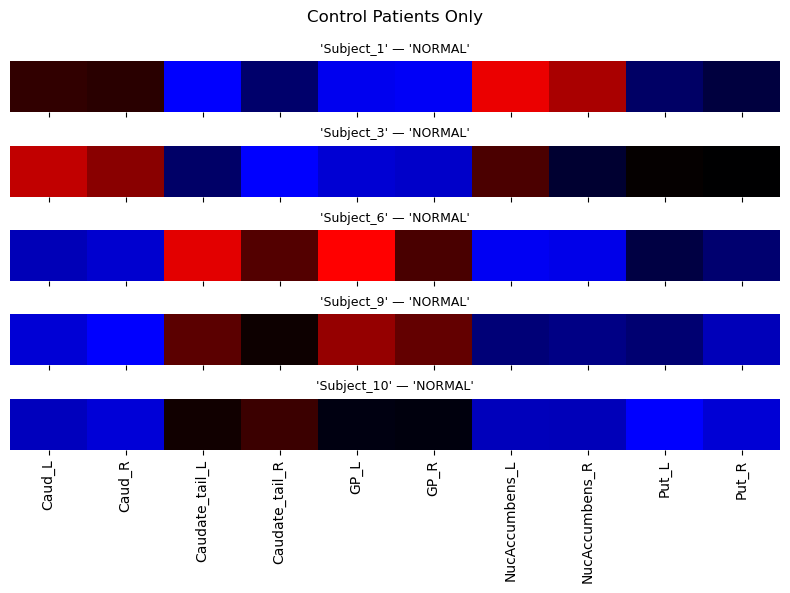

In [13]:
# plot barcodes for select CONTROL subjects 
control_patients = z_scores[z_scores["Diagnosis"] == "'NORMAL'"].head(5)

fig, axes = plt.subplots(5, 1, figsize=(8, 6), sharex=True)

for i, (_, row) in enumerate(control_patients.iterrows()):
    vals = row.drop(labels=["Subject_ID", "Diagnosis"]).astype(float).to_numpy().reshape(1, -1)
    sns.heatmap(
        vals,
        cmap=cmap,
        center=0,
        cbar=False,
        xticklabels=(z_scores.columns.drop(["Subject_ID", "Diagnosis"]) if i == 4 else []),
        yticklabels=[],
        ax=axes[i]
    )
    axes[i].set_title(f"{row['Subject_ID']} — {row['Diagnosis']}", fontsize=9)

fig.suptitle("Control Patients Only")
plt.tight_layout()
plt.show()


In [3]:
# Load the MNI subject data
mni_df = pd.read_csv("MNI Subject/MNI_basal_ganglia_data.csv")
print("MNI Subject Data:")
print(mni_df)

# Extract the ROI names and volumes from MNI data
mni_roi_names = mni_df['ROI_Name'].tolist()
mni_volumes = mni_df['Volume_mm3'].tolist()

print(f"\nMNI ROI names: {mni_roi_names}")
print(f"MNI volumes: {mni_volumes}")

# Create a dictionary for easy lookup
mni_roi_dict = dict(zip(mni_roi_names, mni_volumes))
print(f"\nMNI ROI dictionary: {mni_roi_dict}")

MNI Subject Data:
         ROI_Name  Volume_mm3  Normalized_Volume
0          Caud_L      4649.0           0.708568
1          Caud_R      4875.0           0.747221
2           Put_L      6217.0           0.976740
3           Put_R      6353.0           1.000000
4            GP_L      1853.0           0.230375
5            GP_R      1839.0           0.227980
6  NucAccumbens_L       837.0           0.056610
7  NucAccumbens_R      1097.0           0.101077
8  Caudate_tail_L       506.0           0.000000
9  Caudate_tail_R       616.0           0.018813

MNI ROI names: ['Caud_L', 'Caud_R', 'Put_L', 'Put_R', 'GP_L', 'GP_R', 'NucAccumbens_L', 'NucAccumbens_R', 'Caudate_tail_L', 'Caudate_tail_R']
MNI volumes: [4649.0, 4875.0, 6217.0, 6353.0, 1853.0, 1839.0, 837.0, 1097.0, 506.0, 616.0]

MNI ROI dictionary: {'Caud_L': 4649.0, 'Caud_R': 4875.0, 'Put_L': 6217.0, 'Put_R': 6353.0, 'GP_L': 1853.0, 'GP_R': 1839.0, 'NucAccumbens_L': 837.0, 'NucAccumbens_R': 1097.0, 'Caudate_tail_L': 506.0, 'Caudate_

In [4]:
# Now compute z-scores for the MNI subject using control statistics
# Create a dataframe with MNI subject data in the same format as the ROI_df

# Create MNI subject row with same column names as control data
mni_subject_data = {
    'Subject_ID': 'MNI_Subject',
    'Gender': 'Unknown',
    'Age': 'Unknown', 
    'Diagnosis': 'MNI_Template'
}

# Add the ROI volumes from MNI data
for roi_name in mni_roi_names:
    mni_subject_data[roi_name] = mni_roi_dict[roi_name]

# Convert to DataFrame
mni_subject_df = pd.DataFrame([mni_subject_data])
print("MNI Subject DataFrame:")
print(mni_subject_df)

# Extract only the ROI columns for z-score calculation
mni_roi_values = mni_subject_df[mni_roi_names].astype(float)

# Calculate z-scores for MNI subject using control group statistics
mni_z_scores = (mni_roi_values - control_means) / control_stds
print("\nMNI Subject Z-scores:")
print(mni_z_scores)

# Add back the metadata
mni_z_scores_with_meta = mni_z_scores.copy()
mni_z_scores_with_meta.insert(0, "Subject_ID", "MNI_Subject")
mni_z_scores_with_meta.insert(1, "Diagnosis", "MNI_Template")
mni_z_scores_with_meta.to_csv('./MNI Subject/z_scores.csv')

MNI Subject DataFrame:
    Subject_ID   Gender      Age     Diagnosis  Caud_L  Caud_R   Put_L  \
0  MNI_Subject  Unknown  Unknown  MNI_Template  4649.0  4875.0  6217.0   

    Put_R    GP_L    GP_R  NucAccumbens_L  NucAccumbens_R  Caudate_tail_L  \
0  6353.0  1853.0  1839.0           837.0          1097.0           506.0   

   Caudate_tail_R  
0           616.0  

MNI Subject Z-scores:
     Caud_L    Caud_R  Caudate_tail_L  Caudate_tail_R      GP_L     GP_R  \
0 -0.340141 -0.209144        3.172246        4.301956  1.409337  1.40129   

   NucAccumbens_L  NucAccumbens_R     Put_L     Put_R  
0       -0.490942       -0.341982  0.253448  0.143086  


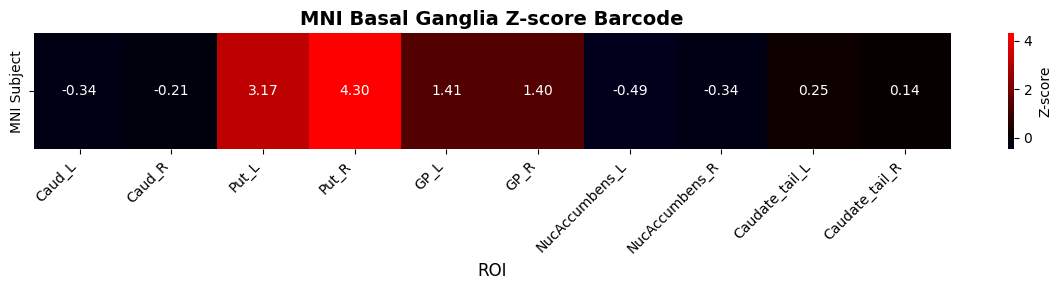

In [14]:
# Create a heatmap showing just the MNI subject barcode
plt.figure(figsize=(12, 3))

# Extract just the z-scores for the MNI subject (exclude metadata columns)
mni_barcode = mni_z_scores.to_numpy()

# Create the heatmap
sns.heatmap(mni_barcode, cmap=cmap, center=0, 
            cbar_kws={"label": "Z-score"}, 
            xticklabels=mni_roi_names,
            yticklabels=['MNI Subject'],
            annot=True,  # Show the z-score values on the heatmap
            fmt='.2f')   # Format to 2 decimal places

plt.title("MNI Basal Ganglia Z-score Barcode", fontsize=14, fontweight='bold')
plt.xlabel("ROI", fontsize=12)
plt.ylabel("")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./MNI Subject/barcode.pdf')
plt.show()

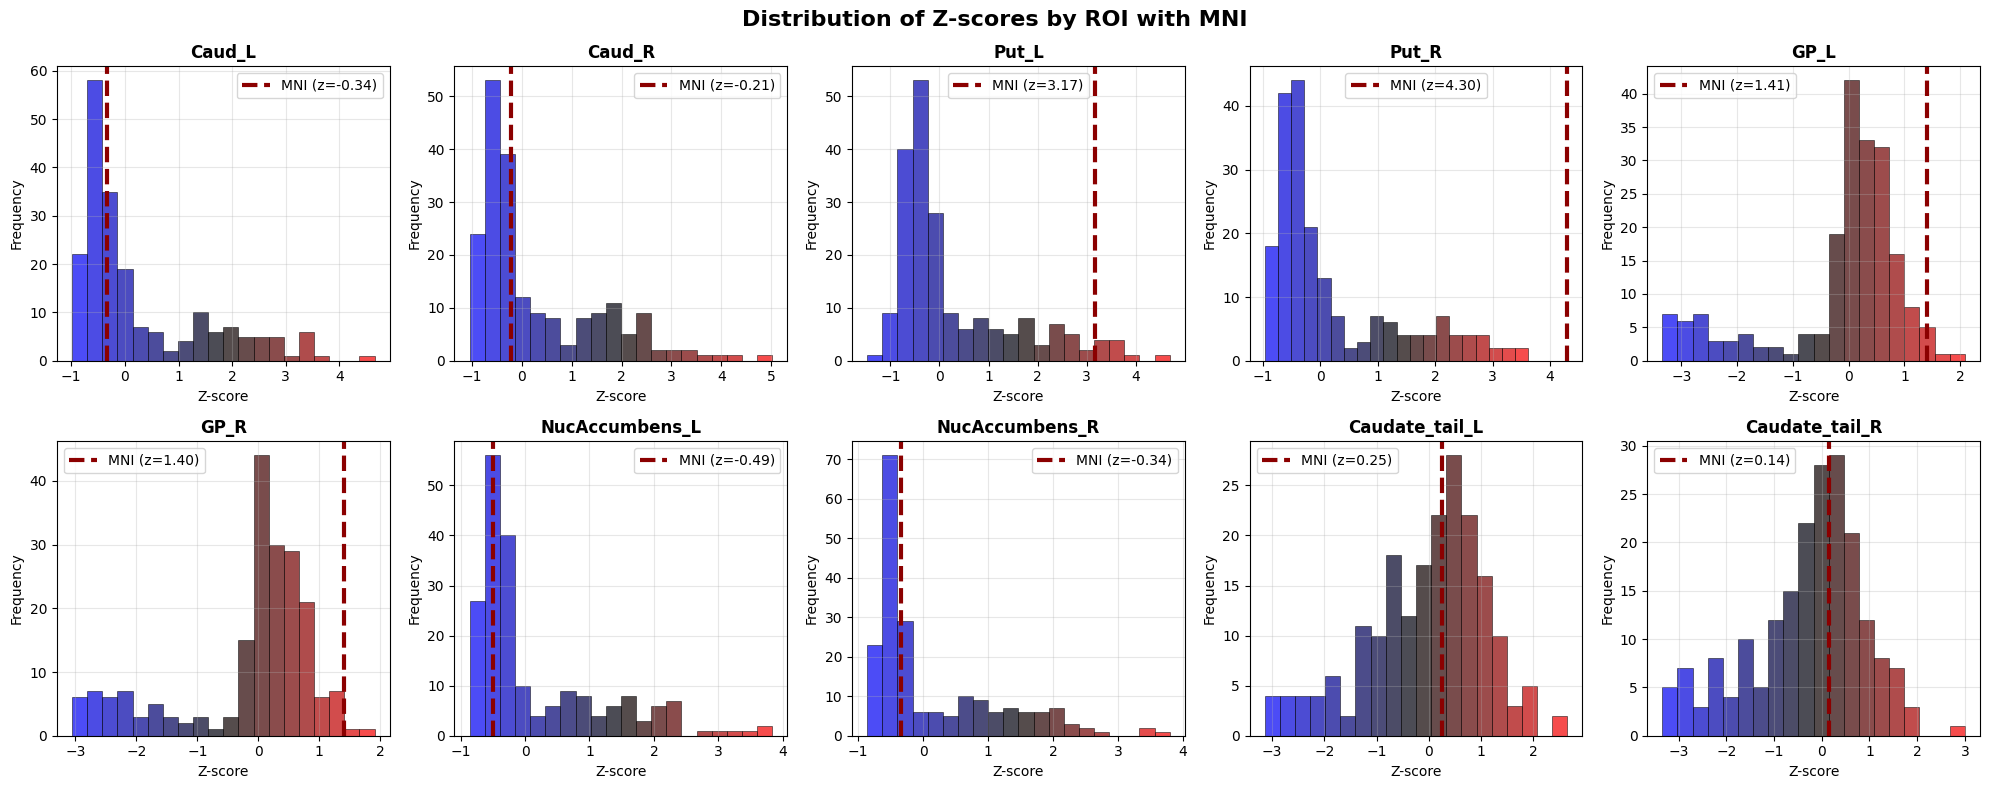

In [13]:
# Create histograms for each ROI showing distribution with MNI subject position
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Get all z-scores for histogram distribution (exclude Subject_ID and Diagnosis columns)
all_z_scores_data = z_scores.drop(columns=["Subject_ID", "Diagnosis"]).astype(float)
mni_z_values = mni_z_scores.iloc[0].values

for i, roi in enumerate(mni_roi_names):
    ax = axes[i]
    
    # Plot histogram of all subjects' z-scores for this ROI
    roi_data = all_z_scores_data[roi]
    
    # Create histogram with color gradient based on z-score values
    n, bins, patches = ax.hist(roi_data, bins=20, edgecolor='black', linewidth=0.5)
    
    # Apply color gradient to histogram bars based on their z-score position
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    # Normalize the bin centers to [0, 1] for colormap
    norm = plt.Normalize(vmin=roi_data.min(), vmax=roi_data.max())
    
    for patch, bin_center in zip(patches, bin_centers):
        color = cmap(norm(bin_center))
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Mark the MNI subject's z-score with a vertical line
    mni_zscore = mni_z_values[i]
    ax.axvline(mni_zscore, color='darkred', linestyle='--', linewidth=3, 
               label=f'MNI (z={mni_zscore:.2f})')
    
    ax.set_title(f'{roi}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribution of Z-scores by ROI with MNI', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('./MNI Subject/hist.pdf')
plt.show()